In [25]:
import csv
import numpy as np
from matplotlib import pyplot
from pylab import rcParams
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#read a file
#インデックスをTIMESTANPに設定し，時系列データとして読み込む(index_col='TIMESTAMP', parse_dates=True)
df01 = pd.read_csv('logger1_2018-03-13_2018-12-16_every1min_withoutRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df02 = pd.read_csv('logger2_2018-03-13_2018-12-16_every1min_withoutRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df03 = pd.read_csv('logger3_2018-03-20_2018-12-16_every1min_withoutRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df04 = pd.read_csv('Precipitation_WL_Velocity201801to201812_every_1min.csv', index_col='TIMESTAMP', parse_dates=True)
# print(df01,df02,df03,df04)

In [4]:
df_all_0 = pd.concat([df01, df02, df03, df04], axis=1,sort=False)
# df_all_0 = pd.concat([df01, df02, df03], axis=1,sort=False)

#NaNデータを削除
df_all_1 = df_all_0.dropna(how='any')

#重複した列を削除(WLなど)
df_all_2 = df_all_1.loc[:,~df_all_1.columns.duplicated()]

#df_all_1.columnsを全部表示させるようにする
pd.options.display.max_seq_items = 200

print(df_all_2.columns)

#pd.options.display.max_seq_itemsを元にもどす(初期値が２０だった)
pd.options.display.max_seq_items = 20

Index(['Unnamed: 0', 'RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg',
       'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
       'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
       'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
       'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'outC_R_Avg',
       'R_Tot(1)', 'R_Tot(2)', 'R_Tot(3)', 'R_Tot(4)', 'R_Tot(5)', 'R_Tot(6)',
       'R_Tot(7)', 'R_Tot(8)', 'R_Tot(9)', 'R_Tot(10)', 'outC_RC_Avg',
       'RC_Tot(1)', 'RC_Tot(2)', 'RC_Tot(3)', 'RC_Tot(4)', 'RC_Tot(5)',
       'RC_Tot(6)', 'RC_Tot(7)', 'RC_Tot(8)', 'RC_Tot(9)', 'RC_Tot(10)',
       'outC_C_Avg', 'C_Tot(1)', 'C_Tot(2)', 'C_Tot(3)', 'C_Tot(4)',
       'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)', 'C_Tot(9)', 'C_Tot(10)',
       'outC_LC_Avg', 'LC_Tot(1)', 'LC_Tot(2)', 'LC_Tot(3)', 'LC_Tot(4)',
       'LC_Tot(5)', 'LC_Tot(6)', 'LC_Tot(7)', 'LC_Tot(8)', 'LC_Tot(9)',
       'LC_Tot(10)', 'outC_L_Avg', 'L_Tot(1)',

In [5]:
#Load_Avgの差分をとる
Load_Avg_difference = pd.DataFrame(df_all_2['Load_Avg'].diff())

# #Fill out NaNs with 0.
# Load_Avg_difference = Load_Avg_difference.fillna(0)
# # print(Load_Avg_difference)

# Load_Avg_difference.columns = 'Load_Avg_difference'
Load_Avg_difference.rename(columns={"Load_Avg":"Load_Avg_difference"}, inplace=True)

#Concatnate df with Load_Avg_difference
df_all_LAD = pd.concat([df_all_2, Load_Avg_difference], axis=1)
# print(df_all_LAD)

In [33]:
def sanjo(x):
    sanjo = x*x*x
    return sanjo

# df_all_LAD['Velocity(m/s)'] = df_all_LAD['Velocity(m/s)'].map(sanjo)

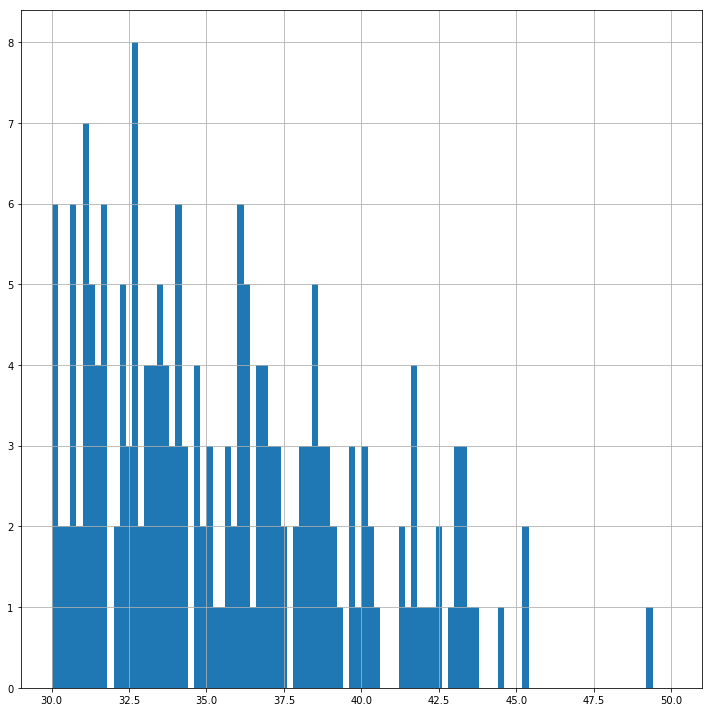

In [6]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_all_LAD['Load_Avg_difference'].hist(bins=100,range=(30, 50))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [7]:
print(len(df_all_LAD[df_all_LAD['Load_Avg_difference'] > 30]))
print(df_all_LAD['hp_Tot(6)'][df_all_LAD['Load_Avg_difference'] > 30])
print(df_all_LAD['Load_Avg'][df_all_LAD['Load_Avg_difference'] > 30])

196
TIMESTAMP
2018-04-15 06:31:00     72.0
2018-04-23 08:33:00      2.0
2018-04-28 09:33:00      0.0
2018-04-28 09:57:00      0.0
2018-04-28 10:08:00     18.0
2018-04-28 10:09:00      6.0
2018-04-28 10:10:00      0.0
2018-04-28 10:16:00      0.0
2018-04-28 10:20:00     10.0
2018-04-28 10:25:00      0.0
2018-04-28 10:34:00      0.0
2018-04-28 10:44:00      0.0
2018-04-28 10:47:00     11.0
2018-04-28 10:50:00      0.0
2018-04-28 10:57:00      0.0
2018-04-28 10:58:00     25.0
2018-07-04 21:28:00    222.0
2018-07-16 09:45:00      0.0
2018-07-16 10:36:00      0.0
2018-07-16 10:58:00      1.0
2018-07-16 11:02:00      0.0
2018-07-16 11:14:00      2.0
2018-07-16 11:21:00      1.0
2018-09-27 18:01:00      0.0
2018-10-09 13:39:00      0.0
2018-10-09 16:44:00      0.0
2018-10-09 16:50:00      0.0
2018-10-09 21:18:00      0.0
2018-10-09 21:47:00      0.0
2018-10-09 21:56:00      0.0
                       ...  
2018-10-14 03:10:00      0.0
2018-10-14 03:13:00      0.0
2018-10-14 04:35:00      0.0


In [8]:
#4/28日にピット掃除をしていそうだったのでデータを全部削除しました
sidx='2018-04-28 0:00'
eidx='2018-04-29 0:00'
drop_date_range = pd.date_range(sidx, eidx, freq='T')
df_all_LAD_cut1 = df_all_LAD.drop(drop_date_range)

#ピット差分が１０以上で、水平ハイドロフォンの６４倍が０のデータは全て消しました。
df_all_LAD_cut2 = df_all_LAD_cut1[~((df_all_LAD['Load_Avg_difference'] >= 10)&(df_all_LAD['hp_Tot(6)'] == 0))]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


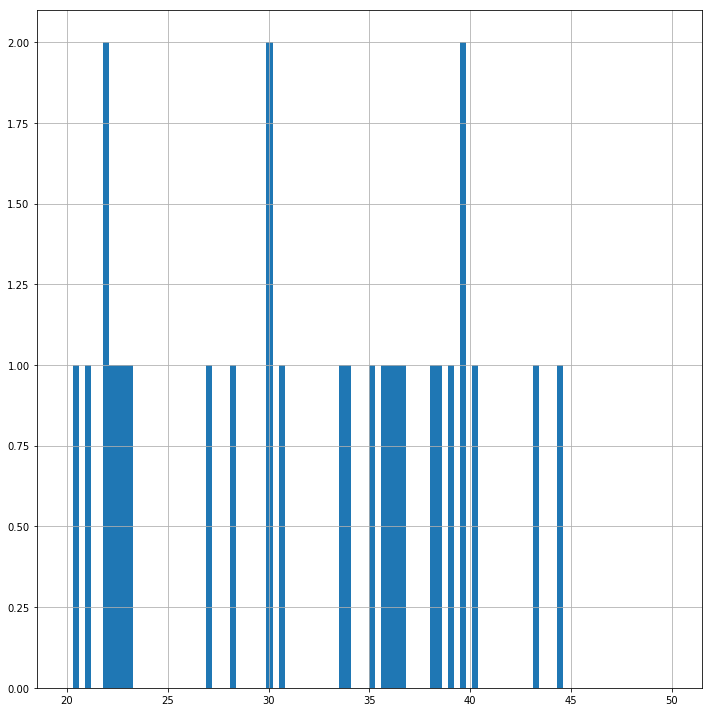

In [9]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_all_LAD_cut2['Load_Avg_difference'].hist(bins=100,range=(20, 50))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [10]:
print(len(df_all_LAD_cut2[df_all_LAD_cut2['Load_Avg_difference'] > 20]))
print(df_all_LAD_cut2['hp_Tot(6)'][df_all_LAD_cut2['Load_Avg_difference'] > 20])
print(df_all_LAD_cut2['Load_Avg'][df_all_LAD_cut2['Load_Avg_difference'] > 20])

28
TIMESTAMP
2018-04-15 06:31:00     72.0
2018-04-23 08:33:00      2.0
2018-06-28 11:46:00    488.0
2018-07-04 21:28:00    222.0
2018-07-05 23:23:00    333.0
2018-07-16 10:41:00      1.0
2018-07-16 10:58:00      1.0
2018-07-16 10:59:00      1.0
2018-07-16 11:14:00      2.0
2018-07-16 11:21:00      1.0
2018-10-09 22:17:00      1.0
2018-10-10 01:06:00      1.0
2018-10-10 05:12:00      1.0
2018-10-10 05:20:00      1.0
2018-10-10 07:40:00      1.0
2018-10-10 08:47:00      1.0
2018-10-10 13:40:00      1.0
2018-10-10 14:49:00      1.0
2018-10-10 15:11:00      1.0
2018-10-10 18:43:00      1.0
2018-10-10 21:15:00      1.0
2018-10-12 21:26:00      1.0
2018-10-12 22:04:00      1.0
2018-10-12 23:42:00      1.0
2018-10-13 02:05:00      1.0
2018-10-13 05:54:00      1.0
2018-10-13 15:39:00      1.0
2018-10-13 21:10:00      1.0
Name: hp_Tot(6), dtype: float64
TIMESTAMP
2018-04-15 06:31:00     469.0
2018-04-23 08:33:00    1007.0
2018-06-28 11:46:00    1390.0
2018-07-04 21:28:00    1446.0
2018-07-05 23

In [ ]:
# df_all_LAD_cut2['2018-10-10 0:00' : '2018-10-11 0:00']

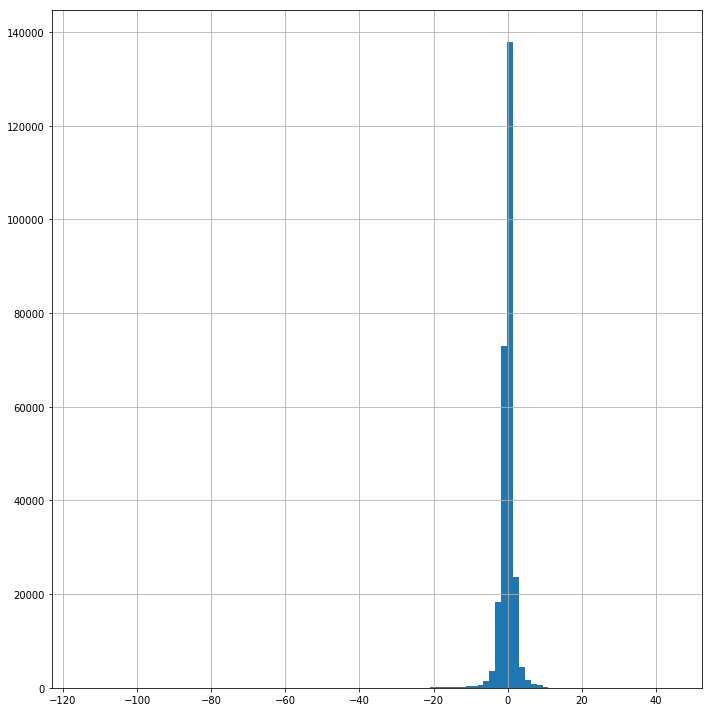

In [12]:
# moving averages
#Setting a rate of moving averages
mavgs = 30
df_movingav_30 = df_all_LAD_cut2.rolling(mavgs,min_periods=int(mavgs-2) ).mean()
# print(df_movingav_30)
# NaNデータを削除
df1_movingav_30 = df_movingav_30.dropna(how='any')
# print(df1_movingav_30)

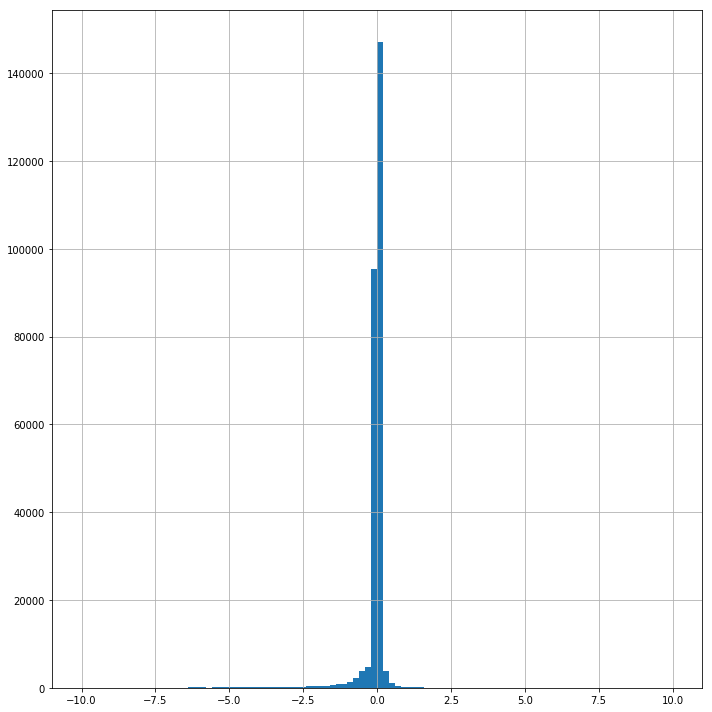

In [31]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_movingav_30['Load_Avg_difference'].hist(bins=100,range=(-10,10))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [49]:
df_mean_30 = df_all_LAD_cut2.asfreq('30T')


In [50]:
print(df_mean_30.head())

                     Unnamed: 0  RECORD  Bat_Avg  Pit_WL_Avg  L_UR_Avg  \
TIMESTAMP                                                                
2018-03-26 13:35:00     18279.0     1.0    12.69       79.14     74.99   
2018-03-26 14:05:00     18309.0    31.0    12.69       79.10     75.08   
2018-03-26 14:35:00     18339.0    61.0    12.68       79.14     75.29   
2018-03-26 15:05:00     18369.0    91.0    12.67       79.15     74.97   
2018-03-26 15:35:00     18399.0   121.0    12.69       79.12     74.97   

                     L_UL_Avg  L_DR_Avg  L_DL_Avg  Load_Avg  WL_FMR_Avg  ...  \
TIMESTAMP                                                                ...   
2018-03-26 13:35:00     29.63     27.87     62.02     194.5       4.263  ...   
2018-03-26 14:05:00     29.73     28.22     62.05     195.1       4.525  ...   
2018-03-26 14:35:00     29.94     28.62     62.10     196.0       4.352  ...   
2018-03-26 15:05:00     29.75     28.79     61.98     195.5       4.542  ...   
2

In [14]:
#Determine which DataFrame you are gonna use
# df_fin = df1_mean_30
df_fin = df1_movingav_30

In [38]:
def cut_by_pit_value(x, y, df):
    
    '''
    x：ピットの下限
    y：ピットの上限
    df：df_finを入れればいい

    ピット内重量がx以上y以下のデータのみを取り出す
    '''
    df_cut = df_fin[(df_fin['Load_Avg'] > x)&(df_fin['Load_Avg'] < y)]
    return df_cut

#ピット内が０～２００kgの時を取り出す
df_cut_from0to200 = cut_by_pit_value(0, 200, df_fin)
#ピット内が２００～４００kgの時を取り出す
df_cut_from200to400 = cut_by_pit_value(200, 400, df_fin)
#ピット内が４００～６００kgの時を取り出す
df_cut_from400to600 = cut_by_pit_value(400, 600, df_fin)
#ピット内が６００～８００kgの時を取り出す
df_cut_from600to800 = cut_by_pit_value(600, 800, df_fin)
#ピット内が８００～１０００kgの時を取り出す
df_cut_from800to1000 = cut_by_pit_value(800, 1000, df_fin)
#ピット内が１０００～１２００kgの時を取り出す
df_cut_from1000to1200 = cut_by_pit_value(1000, 1200, df_fin)
#ピット内が１２００～１４００kgの時を取り出す
df_cut_from1200to1400 = cut_by_pit_value(1200, 1400, df_fin)
#ピット内が１４００～１６００kgの時を取り出す
df_cut_from1400to1600 = cut_by_pit_value(1400, 1600, df_fin)

In [40]:
def histgram_of_Load_Avg_difference(df, num_bins=100, nums_range=(-10,10)):
    # グラフが見きれないようにするためサイズを大きくしておく
    rcParams['figure.figsize'] = 5, 5
    # ヒストグラムを描画する(一括の時は単純にdf.hist())
    df['Load_Avg_difference'].hist(bins=num_bins,range=nums_range)
    # グラフ同士が重ならないようにする関数
    plt.tight_layout()
    # グラフの表示
    plt.show()

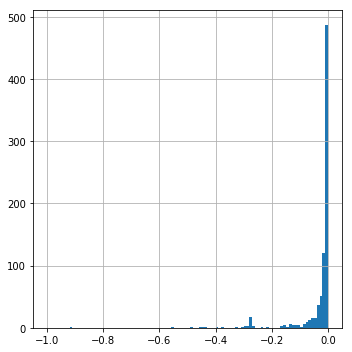

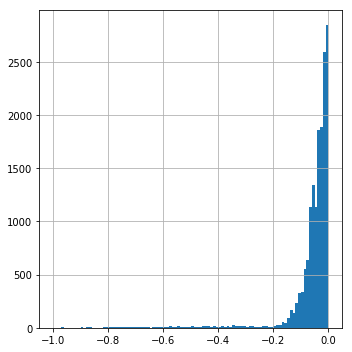

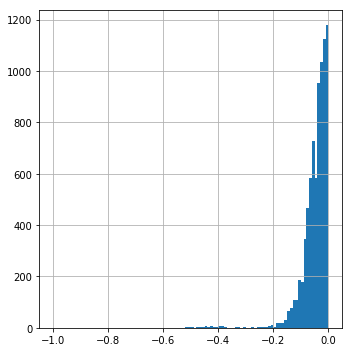

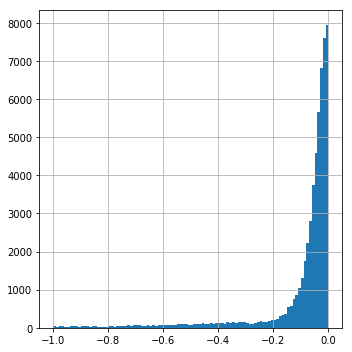

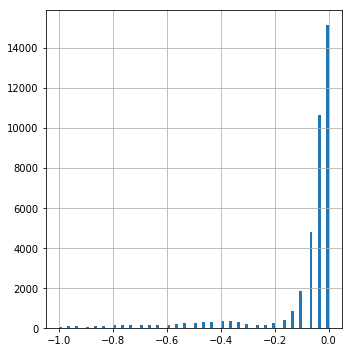

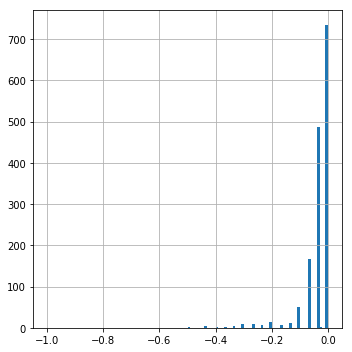

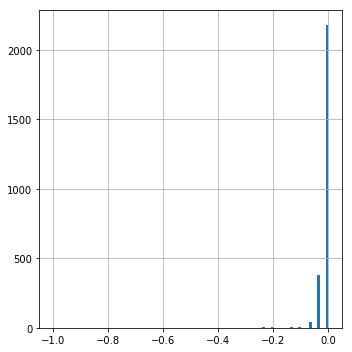

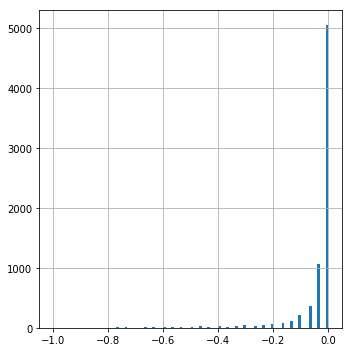

In [41]:
histgram_of_Load_Avg_difference(df_cut_from0to200, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from200to400, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from400to600, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from600to800, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from800to1000, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from1000to1200, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from1200to1400, nums_range=(-1,0))
histgram_of_Load_Avg_difference(df_cut_from1400to1600, nums_range=(-1,0))

In [48]:
def scatter_graph_in_df(df, x_name, y_name, x_range=(-500,500), y_range=(-100,500)):
    '''
    df :　DetaFrame
    x_name：ｘ軸に用いるパラメータの名前(str)
    y_name：ｙ軸に用いるパラメータの名前(str)
    '''
    # 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
    # る相関関係を1 つの平面上で可視化可能
    # Notebook出力には次の１行が必要
    a, b = x_range
    c, d = y_range
    %matplotlib inline
    # Plot the data you select
    plt.figure(figsize=(8, 6))

    plt.scatter(df[x_name], df[y_name])
    plt.xlim(a, b)
    plt.ylim(c, d)

    plt.show()    

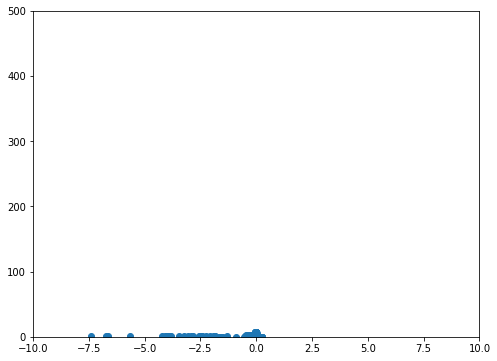

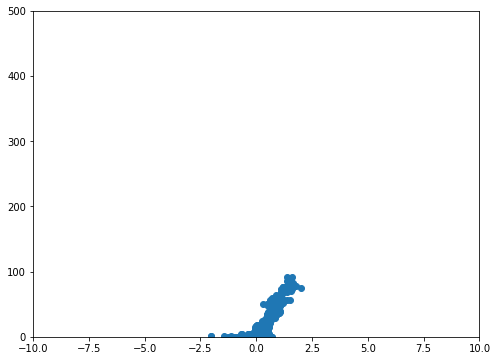

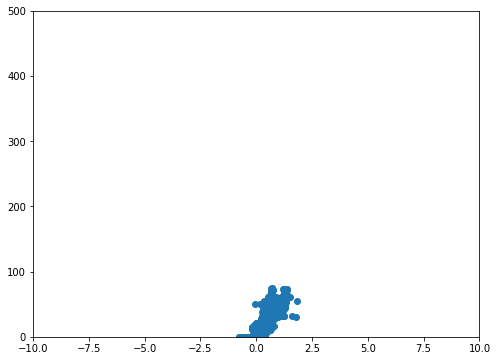

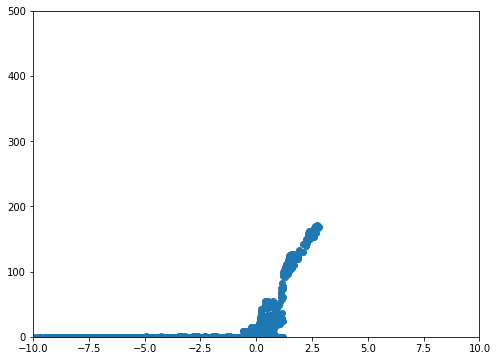

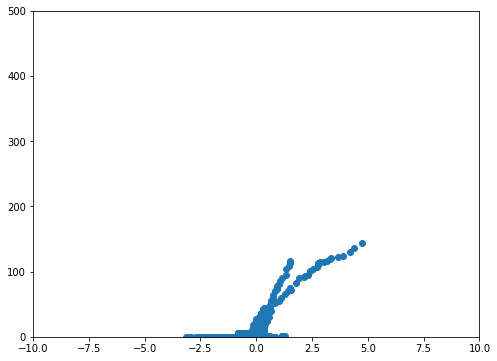

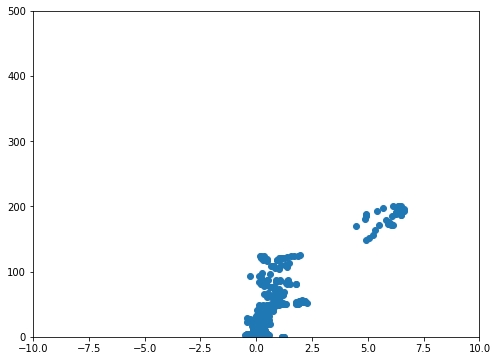

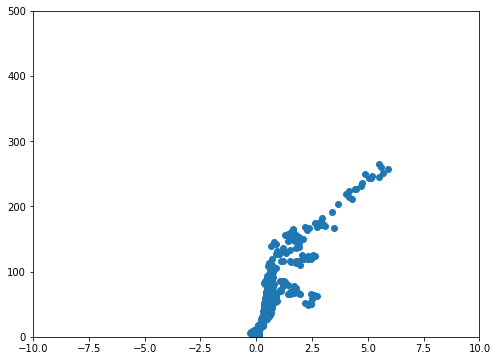

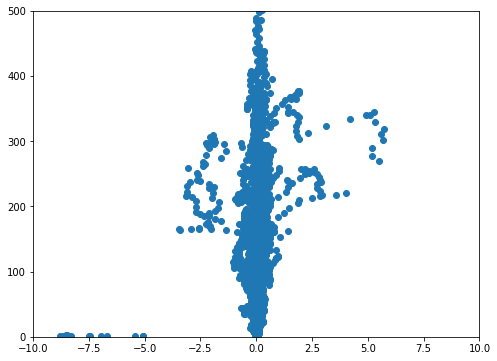

In [47]:
scatter_graph_in_df(df_cut_from0to200, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from200to400, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from400to600, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from600to800, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from800to1000, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from1000to1200, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from1200to1400, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))
scatter_graph_in_df(df_cut_from1400to1600, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-10,10),y_range=(0,500))


In [15]:
pd.options.display.max_seq_items = 200

print(df_fin.columns)

pd.options.display.max_seq_items = 20

Index(['Unnamed: 0', 'RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg',
       'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
       'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
       'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
       'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'outC_R_Avg',
       'R_Tot(1)', 'R_Tot(2)', 'R_Tot(3)', 'R_Tot(4)', 'R_Tot(5)', 'R_Tot(6)',
       'R_Tot(7)', 'R_Tot(8)', 'R_Tot(9)', 'R_Tot(10)', 'outC_RC_Avg',
       'RC_Tot(1)', 'RC_Tot(2)', 'RC_Tot(3)', 'RC_Tot(4)', 'RC_Tot(5)',
       'RC_Tot(6)', 'RC_Tot(7)', 'RC_Tot(8)', 'RC_Tot(9)', 'RC_Tot(10)',
       'outC_C_Avg', 'C_Tot(1)', 'C_Tot(2)', 'C_Tot(3)', 'C_Tot(4)',
       'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)', 'C_Tot(9)', 'C_Tot(10)',
       'outC_LC_Avg', 'LC_Tot(1)', 'LC_Tot(2)', 'LC_Tot(3)', 'LC_Tot(4)',
       'LC_Tot(5)', 'LC_Tot(6)', 'LC_Tot(7)', 'LC_Tot(8)', 'LC_Tot(9)',
       'LC_Tot(10)', 'outC_L_Avg', 'L_Tot(1)',

In [16]:
#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols = ['Load_Avg_difference']
y_cols = ['Load_Avg_difference']

#ALL
# X_cols = ['Bat_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
#        'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
#        'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
#        'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)','outC_R_Avg', 'R_Tot(1)', 'R_Tot(2)', 'R_Tot(3)',
#        'R_Tot(4)', 'R_Tot(5)', 'R_Tot(6)', 'R_Tot(7)', 'R_Tot(8)', 'R_Tot(9)',
#        'R_Tot(10)', 'outC_RC_Avg', 'RC_Tot(1)', 'RC_Tot(2)', 'RC_Tot(3)',
#        'RC_Tot(4)', 'RC_Tot(5)', 'RC_Tot(6)', 'RC_Tot(7)', 'RC_Tot(8)',
#        'RC_Tot(9)', 'RC_Tot(10)', 'outC_C_Avg', 'C_Tot(1)', 'C_Tot(2)',
#        'C_Tot(3)', 'C_Tot(4)', 'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)',
#        'C_Tot(9)', 'C_Tot(10)', 'outC_LC_Avg', 'LC_Tot(1)', 'LC_Tot(2)',
#        'LC_Tot(3)', 'LC_Tot(4)', 'LC_Tot(5)', 'LC_Tot(6)', 'LC_Tot(7)',
#        'LC_Tot(8)', 'LC_Tot(9)', 'LC_Tot(10)', 'outC_L_Avg', 'L_Tot(1)',
#        'L_Tot(2)', 'L_Tot(3)', 'L_Tot(4)', 'L_Tot(5)', 'L_Tot(6)', 'L_Tot(7)',
#        'L_Tot(8)', 'L_Tot(9)', 'L_Tot(10)', 'outC_VR_Avg', 'VR_Tot(1)',
#        'VR_Tot(2)', 'VR_Tot(3)', 'VR_Tot(4)', 'VR_Tot(5)', 'VR_Tot(6)',
#        'VR_Tot(7)', 'VR_Tot(8)', 'VR_Tot(9)', 'VR_Tot(10)', 'outC_VL_Avg',
#        'VL_Tot(1)', 'VL_Tot(2)', 'VL_Tot(3)', 'VL_Tot(4)', 'VL_Tot(5)',
#        'VL_Tot(6)', 'VL_Tot(7)', 'VL_Tot(8)', 'VL_Tot(9)', 'VL_Tot(10)',
#        'outC_VC_Avg', 'VC_Tot(1)', 'VC_Tot(2)', 'VC_Tot(3)', 'VC_Tot(4)',
#        'VC_Tot(5)', 'VC_Tot(6)', 'VC_Tot(7)', 'VC_Tot(8)', 'VC_Tot(9)',
#        'VC_Tot(10)', 'outC_T75_Avg', 'T75_Tot(1)', 'T75_Tot(2)', 'T75_Tot(3)',
#        'T75_Tot(4)', 'T75_Tot(5)', 'T75_Tot(6)', 'T75_Tot(7)', 'T75_Tot(8)',
#        'T75_Tot(9)', 'T75_Tot(10)', 'outC_Plate_Avg', 'Plate_Tot(1)',
#        'Plate_Tot(2)', 'Plate_Tot(3)', 'Plate_Tot(4)', 'Plate_Tot(5)',
#        'Plate_Tot(6)', 'Plate_Tot(7)', 'Plate_Tot(8)', 'Plate_Tot(9)',
#        'Plate_Tot(10)', 'Vib_Avg','Precipitation(mm)', 'Velocity(m/s)', 'WaterLevel(cm)']
X_cols = ['hp_Tot(5)', 'hp_Tot(6)']

X = df_fin[X_cols]
y = df_fin[y_cols]
# #     X.rolling(window=5).mean()
#     y.rolling(window=5).mean()



In [11]:
# print(X)

In [34]:
#Cut data where pit weigh < 1000?500?
df_fin['Load_Avg'] = df_fin['Load_Avg'].values.astype('float')
df_cut1 = df_fin[(df_fin['Load_Avg'] > 200)&(df_fin['Load_Avg'] < 1300)]

# Cut data where pit load difference is out of margin of error
df_cut2 = df_cut1[(df_cut1['Load_Avg_difference'] < 20)&(df_cut1['Load_Avg_difference'] > -0.5)]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


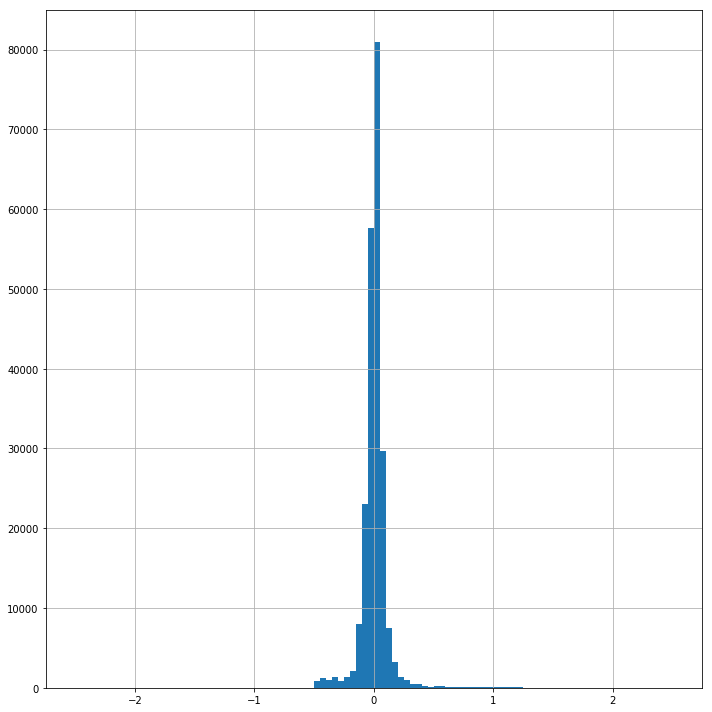

In [36]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_cut2['Load_Avg_difference'].hist(bins=100,range=(-2.5,2.5))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [18]:
def scatter_plot_matrix(df):
    # 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
    # る相関関係を1 つの平面上で可視化可能
    import matplotlib.pyplot as plt
    import seaborn as sns
    Xy_cols = X_cols + y_cols
    df_f = df[Xy_cols].astype('float')
#     sns.pairplot(df_f[Xy_cols],x_vars=['Load_Avg_difference'], y_vars= Xy_cols, height=2.5)
    sns.pairplot(df_f[Xy_cols],x_vars=Xy_cols, y_vars= ['Load_Avg_difference'], height=2.5)

    #グラフを保存するときは描画させない
    plt.show()
    # plt.savefig('figure(LADandOthers).png')

#Sometimes it takes so much time to implement this when the data is large. When I tried to make a 100*100 matrix, it didn't finish within a day so I canceled it.
#Just keep that in mind.

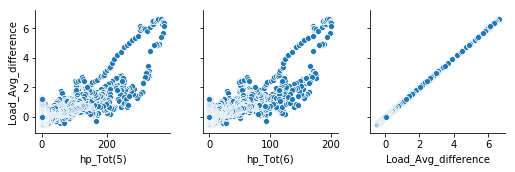

In [19]:
#Sometimes it takes so much time to implement this when the data is large. When I tried to make a 100*100 matrix, it didn't finish within a day so I canceled it.
#Just keep that in mind.
scatter_plot_matrix(df_cut2)

In [20]:
#Sometimes this def takes so much time to implement if input data is large.
def time_series_graph_of_two_inputs(input1, input2, label1, label2):
    fig, ax1 = plt.subplots()

    #x軸
    s=df_cut2.index

    #主軸に出来高の棒グラフ
    ax1.bar(s,df_cut2[input1], color = 'g')

    #主軸と2軸の関連づけ
    ax2=ax1.twinx()

    #第2軸に株価
    ax2.plot(s,df_cut2[input2],'r', label = 'label2')

    # 描画の調整
    plt.rcParams['font.size'] = 8
    plt.ylabel(label1)
    plt.legend()
    # plt.savefig('compiration_LADandHP(1).png')
    plt.show()

In [15]:
# time_series_graph_of_two_inputs(input1='hp_Tot(6)',input2='Load_Avg_difference',label1='pulses',label2='kg')

In [21]:
X = df_cut2[X_cols].values.astype('float')
y = df_cut2[y_cols].values.astype('float')

In [22]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_ori_train = X_train
X_ori_test = X_test
y_ori_train = y_train
y_ori_test = y_test

In [27]:
# %%time
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(100)
# n_estimators : integer, optional (default=10)
# The number of trees in the forest.

model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
#Score
#coefficient of determination R^2 

print(model.score(X_test,y_test))

0.5665706336817267


In [29]:
# #Score without the data where there's no events happning
#Delete data of when the pit gets cleared 

df_y_test = pd.DataFrame(y_test)
df_y_test.columns = y_cols
df_X_test = pd.DataFrame(X_test)
df_X_test.columns = X_cols

df_yX_test = pd.concat([df_y_test, df_X_test], axis=1)

# df_yX_test_del = df_yX_test[(df_yX_test['Load_Avg_difference'] < 20)&(df_yX_test['Load_Avg_difference'] > 1)]
df_yX_test_del = df_yX_test[(df_yX_test['hp_Tot(5)'] > 10)]

X_test_del = df_yX_test_del[X_cols].values.astype('float')
y_test_del = df_yX_test_del[y_cols].values.astype('float')


print("Score ,when y>1")
print(model.score(X_test_del,y_test_del))
print("The number of the data where y > 1 ", "is " ,len(y_test_del))
print("The number of the data where 'hp_Tot(5)' > 10", "is " ,len(y_test_del))

Score ,when y>1
0.8667025338029445
The number of the data where y > 1  is  1158
The number of the data where 'hp_Tot(5)' > 10 is  1158


In [32]:
# y, X should be real data. X is gonna put into the model you made 
# and the model will give you the predictions. 
# This line graph shows how the predicitons match with the real data which is y.
# Second gragh zooms out the part where you chose from sta to end.
class Graph:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        

    def line_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)
        #flatten y_test to applay the data to a graph
        y_graph = self.y.flatten()
        #
        df_result = pd.DataFrame({"y_test":y_graph,"result":result})

        #
        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        # Draw graph
        df_result.plot(figsize=(15, 3))
        
        # Zoom out where you chose
        df_result[sta:end].plot(figsize=(15, 3))
        plt.show()
        
    def cumlate_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)

        p_res = np.cumsum(result)
        y_res = np.cumsum(self.y)

        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        df_p_x = pd.DataFrame({"original":y_res,"result":p_res})
        df_p_x.plot(figsize=(15, 3))
        df_p_x[sta:end].plot(figsize=(15, 3))
        plt.show()

        
    #Take a look at a distribution map between y and X
    def distribution_map(self, number = 0):
        import matplotlib.pyplot as plt
        # Notebook出力には次の１行が必要
        %matplotlib inline

        # # Plot the data you select
        plt.figure(figsize=(8, 6))

        plt.scatter(self.y, self.X[:,number])
        plt.show()

        
    


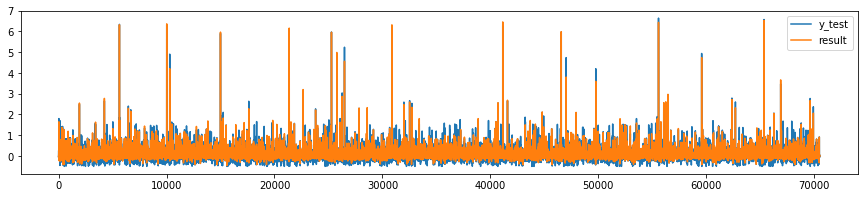

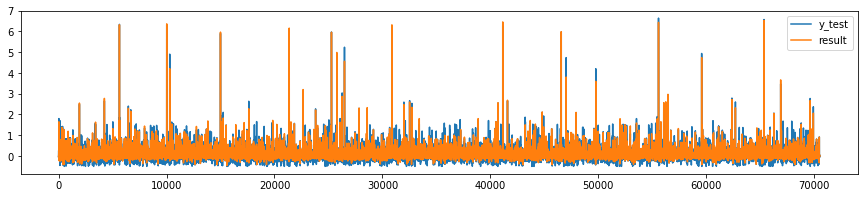

In [33]:
# Graphs of test data

yX_test = Graph(y_test,X_test)
yX_test.line_graph()
# for i in range(len(X_cols)):
#     yX_test.distribution_map(i)
# yX_test.cumlate_graph()

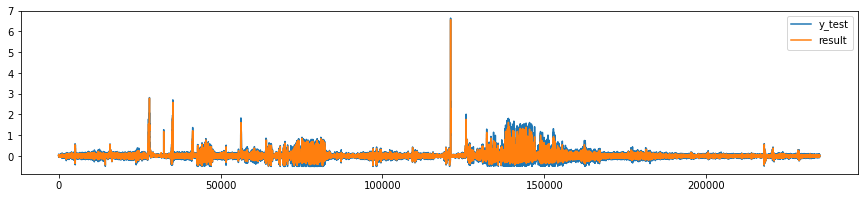

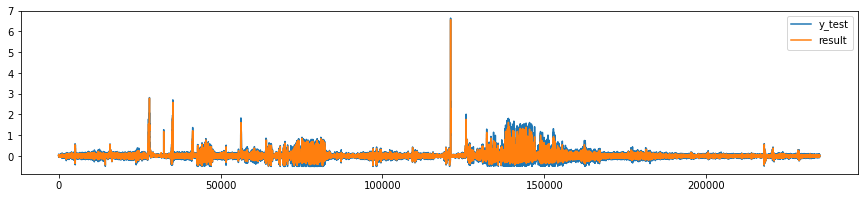

In [34]:
yX_all = Graph(y, X)
yX_all.line_graph()
# yX_all.cumlate_graph(90000,100000)
# for i in range(len(X_cols)):
#     yX_all.distribution_map(i)
#     print(X_cols[i])

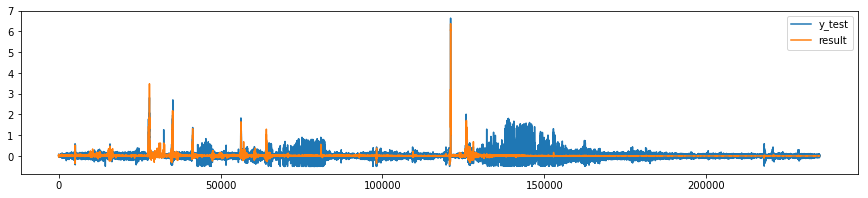

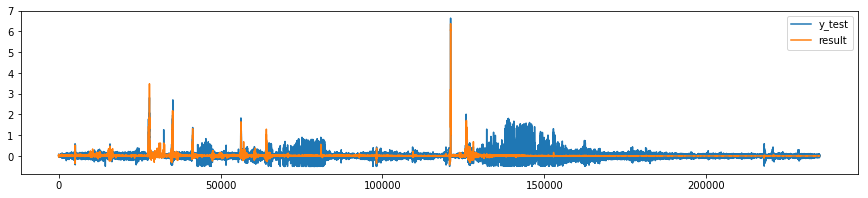

In [39]:
yX_all = Graph(y, X)
yX_all.line_graph()

In [40]:
yX_test_del = Graph(y_test_del, X_test_del)
yX_test_del.distribution_map(3)
yX_test_del.cumlate_graph()
yX_test_del.line_graph()

IndexError: index 3 is out of bounds for axis 1 with size 2

<Figure size 576x432 with 0 Axes>

In [41]:
df_ori = df_new[(df_new['hp_Tot(6)'] > -10)&(df_new['hp_Tot(6)'] < 500)]

X_ori = df_ori[X_cols].values.astype('float')
y_ori = df_ori[y_cols].values.astype('float')


yX_ori = Graph(y_ori, X_ori)
yX_ori.cumlate_graph()


NameError: name 'df_new' is not defined

1   hp_Tot(8)   0.1635215643807221
2   VR_Tot(8)   0.08521562384257247
3   C_Tot(8)   0.08328073564964772
4   outC_C_Avg   0.03111756953240135
5   DiffVolt_Avg   0.02215420595121212
6   WL_FMR_Avg   0.01628208073256737
7   outC_Plate_Avg   0.014594746796978628
8   vel_P_Tot   0.013749250604295967
9   Bat_Avg   0.013311796003492337
10   outC_VC_Avg   0.013083050290963225
11   outC_R_Avg   0.0130420402695482
12   VR_Tot(7)   0.012118580521082466
13   hp_Tot(1)   0.011794398074765693
14   outC_VR_Avg   0.01155352763095906
15   outC_L_Avg   0.011541140958534495
16   turb1000_Avg   0.011453052055214574
17   VR_Tot(1)   0.010817846018801362
18   outC_T75_Avg   0.01004658949270821
19   Plate_Tot(1)   0.01001974272928824
20   LC_Tot(1)   0.009951707545592417
21   turb4000_Avg   0.009801703764005194
22   outC_LC_Avg   0.009725599026343073
23   VC_Tot(1)   0.00926675467490137
24   T75_Tot(1)   0.009175639036684492
25   hp_Tot(7)   0.009157095508821943
26   outC_VL_Avg   0.009134536289438418
27  

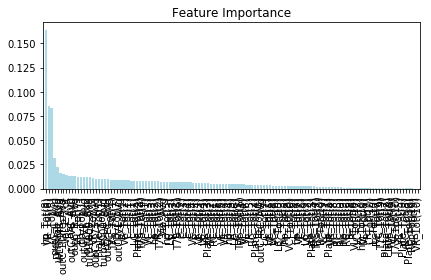

In [22]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [22]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *
# import graphviz

In [23]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *

# X_cols_np = np.array(X_cols)

# regr = tree.DecisionTreeRegressor(max_depth=10)
# regr.fit(X_train, y_train.ravel())

# viz = dtreeviz(regr,
#                X_train,
#                y_train.ravel(),
#                target_name="",
#                feature_names= X_cols_np
#               )

# #There's a UnicodeDecodeError problem if you try to visualize "viz",which is caused by the Japanese setting of this computer.
# #"viz.view()" works fine on Ubuntu in my Virtual machine.
# # viz.view()

In [24]:
# print(regr.score(X_test,y_test))